In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 년도별 승하차 인원 데이터프레임 만들기

In [139]:
pd.read_csv('./data/지하철2016.csv',encoding='cp949')

,행 레이블,합계 : 승차총승객수,합계 : 하차총승객수
0,신사,11459624,12501761
1,가능,2834309,2669515
2,가락시장,5886769,6132827
3,가산디지털단지,20448905,21519835
4,가양,7576731,7287476
...,...,...,...
540,회현,8585888,9103779
541,회현(남대문시장),2387224,2508324
542,효창공원앞,3220324,3111414
543,흑석(중앙대입구),3929584,4060885


In [131]:
def make_sub_passenger(year):
    dt = pd.read_csv(f'./data/지하철{year}.csv',encoding='cp949')
    dt.columns=['역명','승차총승객수','하차총승객수']
    dt['년도']=year
    dt = dt[['년도','역명','승차총승객수','하차총승객수']]
    globals()['dt_{}'.format(year)]=dt

In [132]:
make_sub_passenger(2016)
make_sub_passenger(2017)
make_sub_passenger(2018)
make_sub_passenger(2019)
make_sub_passenger(2020)
make_sub_passenger(2021)

In [135]:
df_list = [dt_16,dt_17,dt_18,dt_19,dt_20,dt_21]
sub_year = pd.concat(df_list,ignore_index=True)

#sub_year_total : 년도별 승하차 총합계
sub_year_total = sub_year[sub_year['역']=='총합계']

# sub_year_total.index
sub_year.drop(index=[544, 1048, 1558, 2068, 2590, 3114],axis=0,inplace=True)
sub_year.reset_index(drop=True, inplace=True)

In [125]:
# sub_year['역'] = sub_year['역'].str.split('역').str[0]

# 지하철 역 주소 데이터 프레임 만들기

In [136]:
# data = pd.read_csv('data/stations/1호선.csv', encoding='cp949')
# for i in range(len(data)):
#     if '서울특별시' not in data['지번주소'][i]:
#         data.drop(i, inplace=True)
# data.drop(columns=['도로명주소', 'Unnamed: 0', '철도운영기관명'], inplace=True)
# data['지번주소'] = data['지번주소'].str.split().str.get(1)
# data.reset_index(drop=True)
# data.rename(columns={'지번주소': '구'}, inplace=True)
# --------------------------------------------------------------------------------------
name_list = ['2호선', '3호선', '4호선', '5호선'
            , '6호선', '7호선', '8호선', '9호선'
            , '경의중앙', '경춘', '공항', '분당', '우이신설']
for j in name_list:
    data1 = pd.read_csv('data/수도권지하철역/' + j + '.csv', encoding='cp949')
    for k in range(len(data1)):
        if '서울특별시' not in data1['지번주소'][k]:
            data1.drop(k, inplace=True)
    data1['지번주소'] = data1['지번주소'].str.split().str.get(1)
    data1.reset_index(drop=True)
    data1.drop(columns=['도로명주소', 'Unnamed: 0', '철도운영기관명'], inplace=True)
    data1.rename(columns={'지번주소': '구'}, inplace=True)
    data = pd.concat([data, data1])
data.drop(columns=['선명.1'], inplace=True)
data.reset_index(drop=True)
data.drop_duplicates(subset=['역명'], inplace=True)
data

,역명,구,경도,위도,선명
0,개화,강서구,126.794962,37.580406,NaN
1,김포공항,강서구,126.802512,37.566773,NaN
2,공항시장,강서구,126.810607,37.563483,NaN
3,신방화,강서구,126.816084,37.567418,NaN
4,마곡나루,강서구,126.827427,37.564979,NaN
...,...,...,...,...,...
242,북한산보국문,성북구,-84.389488,33.791638,NaN
243,정릉,성북구,-84.389488,33.791638,NaN
244,성신여대입구,성북구,127.016714,37.593048,NaN
245,보문,성북구,127.019743,37.585672,NaN


In [138]:
# sub_total.to_excel('sub_total.xlsx')
# data.to_excel('sub_data.xlsx')
# sub_year.to_excel('sub_year.xlsx')

# 엑셀로 수정 후 다시 불러오기

In [5]:
data = pd.read_excel('./data/sub_data_1.xlsx',index_col=0)
data
# data = data[['년도',	'역'	,'승차총승객수',	'하차총승객수']]

sub_year=pd.read_excel('./data/sub_year_1.xlsx',index_col=0)
sub_year

# data.drop(columns='선명',inplace=True)
# data.reset_index(drop=True, inplace=True)
sub_total = pd.merge(sub_year, data, how='right',left_on='역',right_on='역명')
sub_total.drop(columns='역명',inplace=True)

sub_total['년도'] = sub_total['년도'].astype(str)

In [114]:
sub_total

,년도,역,승차총승객수,하차총승객수,구,경도,위도,합계
0,2016,개화,2364215.0,1511052.0,강서구,126.794962,37.580406,3875267.0
1,2017,개화,2379505.0,1592034.0,강서구,126.794962,37.580406,3971539.0
2,2018,개화,1695692.0,2534327.0,강서구,126.794962,37.580406,4230019.0
3,2019,개화,2121477.0,1432111.0,강서구,126.794962,37.580406,3553588.0
4,2020,개화,747305.0,551335.0,강서구,126.794962,37.580406,1298640.0
...,...,...,...,...,...,...,...,...
1436,2017,신설동,7390780.0,7195450.0,동대문구,127.024560,37.576087,14586230.0
1437,2018,신설동,7854333.0,8019534.0,동대문구,127.024560,37.576087,15873867.0
1438,2019,신설동,8160547.0,7948967.0,동대문구,127.024560,37.576087,16109514.0
1439,2020,신설동,5966755.0,5861069.0,동대문구,127.024560,37.576087,11827824.0


# 버스

In [110]:
bus_19 = pd.read_csv('./data/2019_bus.csv',encoding='cp949',index_col=0)                     
bus_20 = pd.read_csv('./data/2020_bus.csv',encoding='cp949',index_col=0)
bus_21 = pd.read_csv('./data/2021_bus.csv',encoding='cp949',index_col=0)

In [112]:
bus_19['합계'] = bus_19['승차수']+bus_19['하차수']
bus_20['합계'] = bus_20['승차수']+bus_21['하차수']
bus_21['합계'] = bus_21['승차수']+bus_21['하차수']

# Choropleth

In [164]:
sub_total['년도'] =sub_total['년도'].str.split('.').str[0]

In [83]:
import requests
import json
import folium

r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [125]:
# 승차수 = bus_20.sort_values(by=['승차수'])
# 하차수 = bus_20.sort_values(by=['하차수'])
bus_sum_19 = bus_19.sort_values(by=['합계'])
bus_sum_20 = bus_20.sort_values(by=['합계'])
bus_sum_21 = bus_21.sort_values(by=['합계'])

In [140]:
bus_sum_21.iloc[10:-1,:]

,년,표준버스정류장ID,정류장명,위도,경도,승차수,하차수,합계
10831,2021,206000654,국은교앞,37.388803,127.075583,50,81,131
5307,2021,113000493,난지천공원다목적구장,37.574184,126.883467,119,14,133
5302,2021,113000488,난지천공원다목적구장,37.573909,126.882749,42,96,138
10832,2021,206000659,판교대장로서측,37.363252,127.067526,96,44,140
10707,2021,206000003,한림아파트,37.388173,127.096188,99,54,153
...,...,...,...,...,...,...,...,...
7348,2021,118000027,경방타임스퀘어.신세계백화점,37.517508,126.906240,2650544,1641596,4292140
8707,2021,121000020,고속터미널,37.505738,127.003793,2250521,2581613,4832134
8706,2021,121000019,고속터미널,37.506292,127.005283,2920209,1971553,4891762
8229,2021,120000001,구로디지털단지역,37.483934,126.902447,1429161,3537241,4966402


In [127]:
sub_16 = sub_total.groupby('년도').get_group('2019')[['구','합계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=sub_16,
             columns=['구','합계'],
             key_on='properties.name',
             fill_color='Greens',
             fill_opacity=0.6,
             legend_name="2019년",
             
            )


for x, y in zip(bus_sum_19.tail(10)['위도'], bus_sum_19.tail(10)['경도']):
        folium.Marker(
        [x, y],icon=folium.Icon(color = 'red')
    ).add_to(m)
for x, y in zip(bus_sum_19.head(10)['위도'], bus_sum_19.head(10)['경도']):
        folium.Marker(
        [x, y],icon=folium.Icon(color = 'blue')
    ).add_to(m)
m


In [124]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron')

for x, y in zip(bus_sum.tail(10)['위도'], bus_sum.tail(10)['경도']):
        folium.Marker(
        [x, y],icon=folium.Icon(color = 'red')
    ).add_to(m)
for x, y in zip(bus_sum.head(10)['위도'], bus_sum.head(10)['경도']):
        folium.Marker(
        [x, y],icon=folium.Icon(color = 'blue')
    ).add_to(m)
m

In [128]:
sub_16 = sub_total.groupby('년도').get_group('2020')[['구','합계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=sub_16,
             columns=['구','합계'],
             key_on='properties.name',
             fill_color='Greens',
             fill_opacity=0.6,
             legend_name="2020년",
             
            )


for x, y in zip(bus_sum_20.tail(10)['위도'], bus_sum_20.tail(10)['경도']):
        folium.Marker(
        [x, y],icon=folium.Icon(color = 'red')
    ).add_to(m)
for x, y in zip(bus_sum_20.head(10)['위도'], bus_sum_20.head(10)['경도']):
        folium.Marker(
        [x, y],icon=folium.Icon(color = 'blue')
    ).add_to(m)
m


In [129]:
sub_16 = sub_total.groupby('년도').get_group('2021')[['구','합계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=sub_16,
             columns=['구','합계'],
             key_on='properties.name',
             fill_color='Greens',
             fill_opacity=0.6,
             legend_name="2021년",
             
            )


for x, y in zip(bus_sum_21.tail(10)['위도'], bus_sum_21.tail(10)['경도']):
        folium.Marker(
        [x, y],icon=folium.Icon(color = 'red')
    ).add_to(m)
for x, y in zip(bus_sum_21.head(10)['위도'], bus_sum_21.head(10)['경도']):
        folium.Marker(
        [x, y],icon=folium.Icon(color = 'blue')
    ).add_to(m)
m

# 순위뽑기

In [32]:
sub_total['년도'] = sub_total['년도'].str.split('.').str[0]

sub_total['합계'] = sub_total['승차총승객수'] + sub_total['하차총승객수']

sub_total.dropna(axis=0,inplace=True)

In [12]:
years = ['2016','2017','2018','2019','2020','2021'] 

In [69]:
def top_bottom3(year):
    print(f'\n{year}년의 승차수 top3 자치구')
    print(sub_total[sub_total['년도']==year].groupby('구')['승차총승객수'].sum().sort_values(ascending=False).index[:3].tolist())    
    print(f'\n{year}년의 승차수 bottom3 자치구')
    print(sub_total[sub_total['년도']==year].groupby('구')['승차총승객수'].sum().sort_values(ascending=False).index[22:].tolist())  
    
    print(f'\n{year}년의 하차수 top3 자치구')
    print(sub_total[sub_total['년도']==year].groupby('구')['하차총승객수'].sum().sort_values(ascending=False).index[:3].tolist())    
    print(f'\n{year}년의 하차수 bottom3 자치구')
    print(sub_total[sub_total['년도']==year].groupby('구')['하차총승객수'].sum().sort_values(ascending=False).index[22:].tolist())   
    
    print(f'\n{year}년의 승하차수 top3 자치구')
    print(sub_total[sub_total['년도']==year].groupby('구')['합계'].sum().sort_values(ascending=False).index[:3].tolist())    
    print(f'\n{year}년의 승하차수 bottom3 자치구')
    print(sub_total[sub_total['년도']==year].groupby('구')['합계'].sum().sort_values(ascending=False).index[22:].tolist())   
    

In [70]:
top_bottom3('2016')


2016년의 승차수 top3 자치구
['강남구', '중구', '마포구']

2016년의 승차수 bottom3 자치구
['금천구', '서대문구', '양천구']

2016년의 하차수 top3 자치구
['강남구', '중구', '마포구']

2016년의 하차수 bottom3 자치구
['금천구', '서대문구', '양천구']

2016년의 승하차수 top3 자치구
['강남구', '중구', '마포구']

2016년의 승하차수 bottom3 자치구
['금천구', '서대문구', '양천구']


In [71]:
top_bottom3('2017')


2017년의 승차수 top3 자치구
['강남구', '중구', '송파구']

2017년의 승차수 bottom3 자치구
['양천구', '금천구', '서대문구']

2017년의 하차수 top3 자치구
['강남구', '중구', '종로구']

2017년의 하차수 bottom3 자치구
['양천구', '금천구', '서대문구']

2017년의 승하차수 top3 자치구
['강남구', '중구', '종로구']

2017년의 승하차수 bottom3 자치구
['양천구', '금천구', '서대문구']


In [72]:
top_bottom3('2018')


2018년의 승차수 top3 자치구
['강남구', '중구', '송파구']

2018년의 승차수 bottom3 자치구
['양천구', '금천구', '서대문구']

2018년의 하차수 top3 자치구
['강남구', '중구', '송파구']

2018년의 하차수 bottom3 자치구
['양천구', '금천구', '서대문구']

2018년의 승하차수 top3 자치구
['강남구', '중구', '송파구']

2018년의 승하차수 bottom3 자치구
['양천구', '금천구', '서대문구']


In [73]:
top_bottom3('2019')


2019년의 승차수 top3 자치구
['강남구', '중구', '송파구']

2019년의 승차수 bottom3 자치구
['양천구', '금천구', '서대문구']

2019년의 하차수 top3 자치구
['강남구', '중구', '송파구']

2019년의 하차수 bottom3 자치구
['양천구', '금천구', '서대문구']

2019년의 승하차수 top3 자치구
['강남구', '중구', '송파구']

2019년의 승하차수 bottom3 자치구
['양천구', '금천구', '서대문구']


In [74]:
top_bottom3('2020')


2020년의 승차수 top3 자치구
['강남구', '송파구', '중구']

2020년의 승차수 bottom3 자치구
['금천구', '양천구', '서대문구']

2020년의 하차수 top3 자치구
['강남구', '송파구', '중구']

2020년의 하차수 bottom3 자치구
['금천구', '양천구', '서대문구']

2020년의 승하차수 top3 자치구
['강남구', '송파구', '중구']

2020년의 승하차수 bottom3 자치구
['금천구', '양천구', '서대문구']


In [75]:
top_bottom3('2021')


2021년의 승차수 top3 자치구
['강남구', '송파구', '서초구']

2021년의 승차수 bottom3 자치구
['금천구', '양천구', '서대문구']

2021년의 하차수 top3 자치구
['강남구', '송파구', '서초구']

2021년의 하차수 bottom3 자치구
['금천구', '양천구', '서대문구']

2021년의 승하차수 top3 자치구
['강남구', '송파구', '서초구']

2021년의 승하차수 bottom3 자치구
['금천구', '양천구', '서대문구']


# 순위 뽑기 시각화

In [82]:
sub_total

,년도,역,승차총승객수,하차총승객수,구,경도,위도,합계
0,2016,개화,2364215.0,1511052.0,강서구,126.794962,37.580406,3875267.0
1,2017,개화,2379505.0,1592034.0,강서구,126.794962,37.580406,3971539.0
2,2018,개화,1695692.0,2534327.0,강서구,126.794962,37.580406,4230019.0
3,2019,개화,2121477.0,1432111.0,강서구,126.794962,37.580406,3553588.0
4,2020,개화,747305.0,551335.0,강서구,126.794962,37.580406,1298640.0
...,...,...,...,...,...,...,...,...
1436,2017,신설동,7390780.0,7195450.0,동대문구,127.024560,37.576087,14586230.0
1437,2018,신설동,7854333.0,8019534.0,동대문구,127.024560,37.576087,15873867.0
1438,2019,신설동,8160547.0,7948967.0,동대문구,127.024560,37.576087,16109514.0
1439,2020,신설동,5966755.0,5861069.0,동대문구,127.024560,37.576087,11827824.0


In [88]:
first = ['종로구', '중구', '용산구', '성동구', '광진구']
second = ['동대문구', '중랑구', '성북구', '강북구', '도봉구']
third = [ '노원구', '은평구', '서대문구', '마포구', '양천구']
fourth = ['강서구', '구로구', '금천구', '영등포구', '동작구']
fifth = ['관악구', '서초구', '강남구', '송파구', '강동구']


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

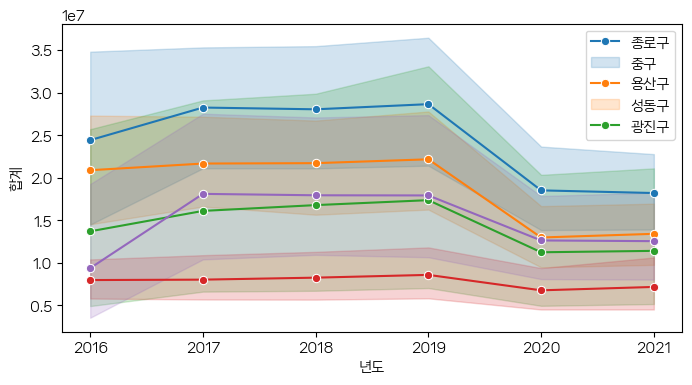

In [92]:
plt.figure(figsize=(8,4))
for g in first:
    data = sub_total[sub_total['구']==g]
    sns.lineplot(x='년도', y='합계',data=data, marker='o')
# plt.ylim(5.5,8.)
# plt.xlim(2003,2021)
plt.legend(first)
# plt.ylabel('지수')

In [133]:
sub_16 = sub_total.groupby('년도').get_group('2021')[['구','합계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=sub_16,
             columns=['구','합계'],
             key_on='properties.name',
             fill_color='Greens',
             fill_opacity=0.6,
             legend_name="2021년",
             
            )


for x, y in zip(bus_sum_21.tail(10)['위도'], bus_sum_21.tail(10)['경도']):
        folium.Marker(
        [x, y],icon=folium.Icon(color = 'red')
    ).add_to(m)
# for x, y in zip(bus_sum_19.head(10)['위도'], bus_sum_19.head(10)['경도']):
#         folium.Marker(
#         [x, y],icon=folium.Icon(color = 'blue')
#     ).add_to(m)
m
